In [2]:
pip install shap

     -------------------------------------- 544.8/544.8 kB 4.9 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [3]:
import shap
import pandas as pd
import matplotlib.pyplot as plt
import sys
sys.path.append('../src')

from data_prep import load_and_clean_data, preprocess_data
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# Load and prepare data
df = load_and_clean_data('../data/raw/WA_Fn-UseC_-Telco-Customer-Churn.csv')
X, y = preprocess_data(df)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit model again if needed
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)


LogisticRegression(max_iter=1000)

In [4]:
# Initialize explainer
explainer = shap.Explainer(model, X_train)

# Compute SHAP values
shap_values = explainer(X_test)


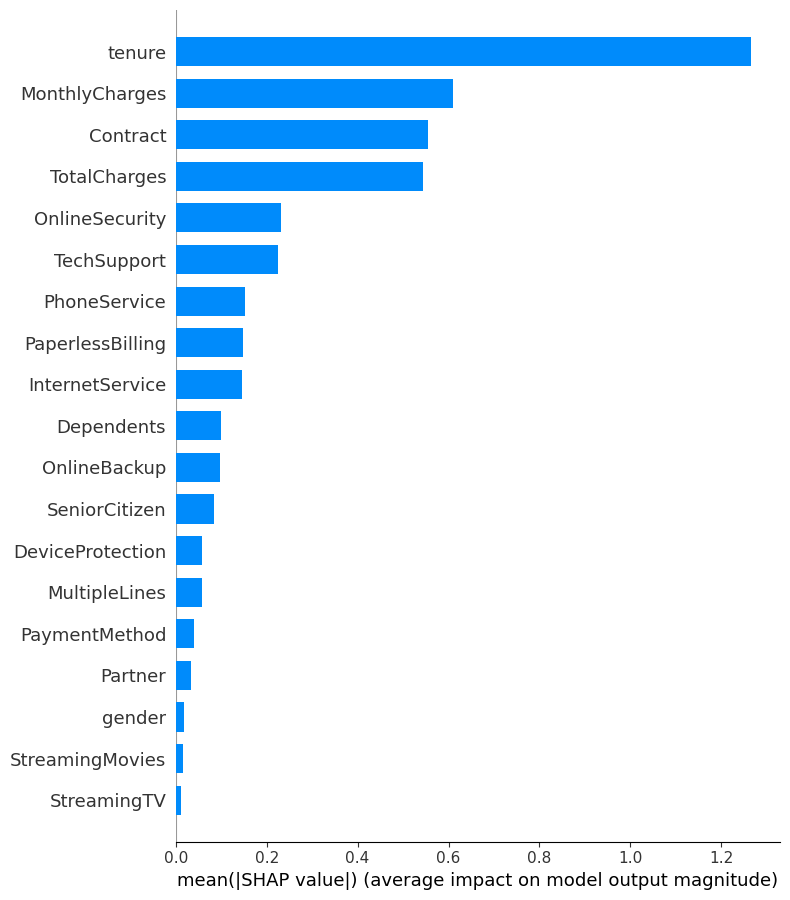

In [7]:
shap.summary_plot(shap_values, X_test, plot_type="bar")
# Save the summary plot to a file
plt.figure()
shap.summary_plot(shap_values, X_test, plot_type="bar", show=False)
plt.title("SHAP Summary Plot - Top Churn Drivers")
plt.savefig("../outputs/figures/shap_summary_plot.png", bbox_inches='tight')
plt.close()


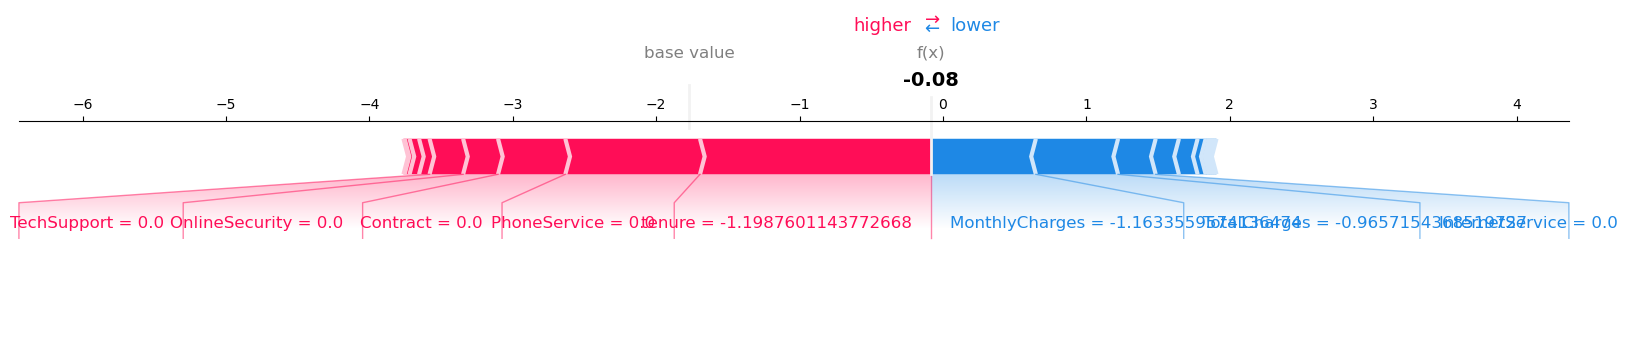

In [8]:
# Pick a single customer (e.g., index 5)
index = 5
shap.plots.force(shap_values[index], matplotlib=True)

# Save an individual prediction explanation as an HTML
shap.initjs()  # needed for HTML plots

# Generate HTML force plot for one prediction
force_plot = shap.plots.force(shap_values[0])

# Save as HTML file
shap.save_html("../outputs/figures/shap_force_plot.html", force_plot)
